In [5]:
using SaddleSearch, SaddleSearch.TestSets
using Plots 
Plots.pyplot()

Plots.PyPlotBackend()


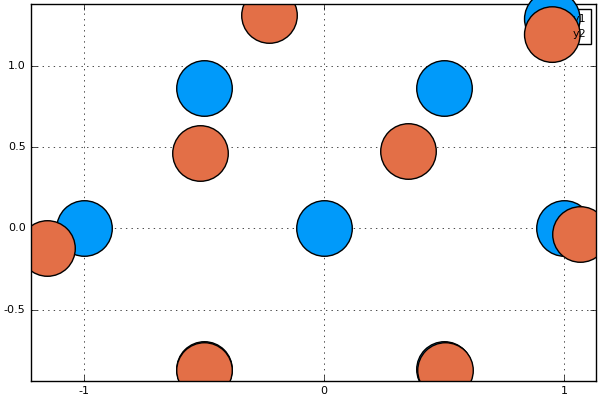

In [7]:
# generate objective and initial condition for saddle search 
V = LJcluster()
E, dE = objective(V)
x0, v0 = ic_dimer(V, :near)

# plot initial condition for saddle search 
R0 = hcat(SaddleSearch.TestSets.lj_refconfig()...)
X0 = reshape(x0, 2, length(x0)÷2)
plot(R0[1,:], R0[2,:], lw=0, marker=:c, markersize=40)
plot!(X0[1,:], X0[2,:], lw=0, marker=:c, markersize=40)


StaticDimerMethod terminated unsuccesfully after 50 iterations.
StaticDimerMethod terminates succesfully after 290 iterations



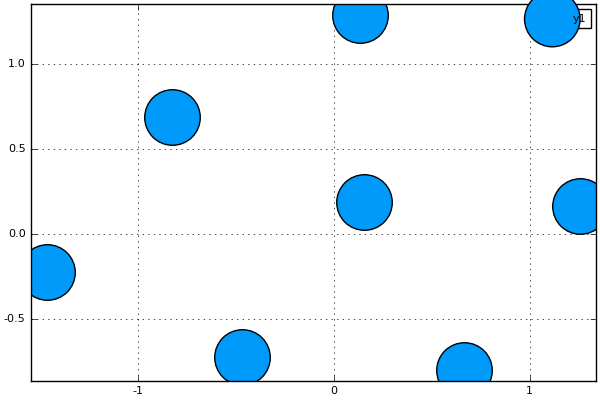

In [9]:
# a painful combination of static-dimer iterations.
verbose=1
# method = StaticDimerMethod(a_trans=0.00001, a_rot = 0.00001, len = 1e-3, maxnit = 50, verbose=verbose)
# x, v, log = run!(method, E, dE, x0, v0);
method = StaticDimerMethod(a_trans=0.001, a_rot = 0.001, len = 1e-3, maxnit = 50, verbose=verbose)
x, v, log = run!(method, E, dE, x0, v0);
method = StaticDimerMethod(a_trans=0.02, a_rot = 0.02, len = 1e-3, maxnit = 1000, verbose=verbose)
x, v, log = run!(method, E, dE, x, v);
X = reshape(x, 2, length(x)÷2)
plot(X[1,:], X[2,:], lw=0, marker=:c, markersize=40)

 nit |  |∇E|_∞    |∇R|_∞        λ         β         γ 
-----|------------------------------------------------
   1 | 4.96e+01  5.32e+01  -8.52e+01  -1.00e+00  -1.00e+00 
   2 | 2.42e+01  3.25e+01  -3.78e+01  1.00e-03  1.00e-03 
   3 | 1.35e+01  1.85e+01  -1.97e+01  1.86e-03  1.57e-03 
   4 | 6.75e+00  9.75e+00  -1.04e+01  3.78e-03  3.25e-03 
   5 | 3.53e+00  4.42e+00  -6.02e+00  7.27e-03  6.27e-03 
   6 | 1.55e+00  2.08e+00  -3.44e+00  1.36e-02  1.12e-02 
   7 | 8.47e-01  1.09e+00  -2.21e+00  2.32e-02  1.97e-02 
   8 | 4.50e-01  9.85e-01  -1.80e+00  3.21e-02  2.86e-02 
   9 | 4.14e-01  9.17e-01  -1.63e+00  2.21e-02  1.53e-02 
  10 | 3.71e-01  9.08e-01  -1.65e+00  1.41e-02  1.26e-02 
  11 | 3.80e-01  8.99e-01  -1.63e+00  1.42e-02  8.57e-03 
  12 | 3.98e-01  8.93e-01  -1.61e+00  3.36e-02  1.77e-02 
  13 | 4.33e-01  8.84e-01  -1.61e+00  7.91e-02  4.46e-02 
  14 | 5.30e-01  1.52e+00  -1.36e+00  1.99e-01  5.69e-02 
  15 | 1.22e+02  1.24e+02  -1.94e+01  4.02e-01  2.59e-02 
  16 | 3.78e+00  1


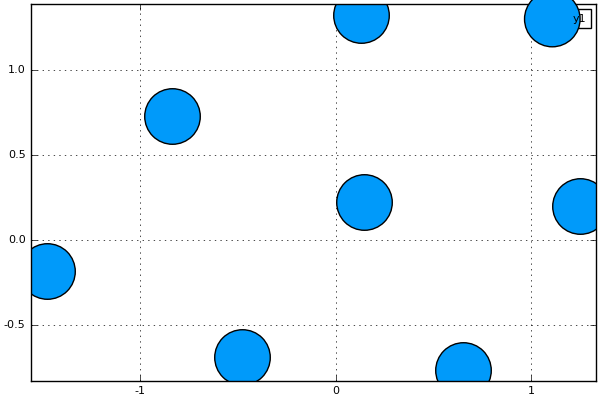

In [21]:
method = BBDimer(a0_trans=0.001, a0_rot = 0.001, len = 1e-3, maxnumdE = 1000, verbose=2)
x, v, log = run!(method, E, dE, x0, v0)
X = reshape(x, 2, length(x)÷2)
plot(X[1,:], X[2,:], lw=0, marker=:c, markersize=40)

BBDimer terminates succesfully after 70 iterations



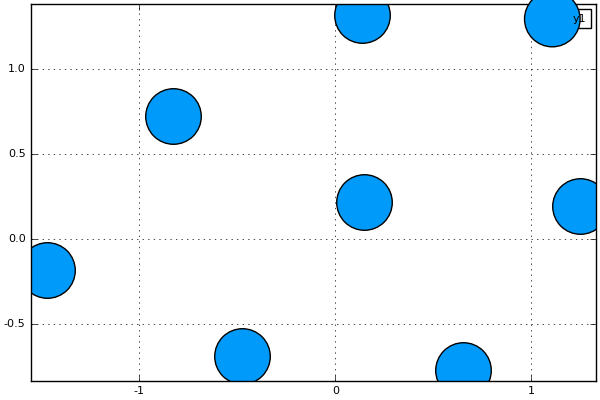

In [20]:
method = BBDimer(a0_trans=0.001, a0_rot = 0.001, len = 1e-3, maxnumdE = 1000, verbose=verbose, 
                ls = SaddleSearch.Backtracking())
x, v, log = run!(method, E, dE, x0, v0)
X = reshape(x, 2, length(x)÷2)
plot(X[1,:], X[2,:], lw=0, marker=:c, markersize=40)